# Punto 4: Modelamiento, Evaluación e Interpretación


Este notebook desarrolla el **ciclo de modelamiento predictivo** sobre el dataset de Uber (`data.csv`)

In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [67]:
data = pd.read_csv('./data/data.csv')
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23/03/2024,12:29:38,CNR5884300,NoDriverFound,CID1982111,eBike,PalamVihar,Jhilmil,0.0,0.0,...,NaN,0,NaN,0,NaN,0,0.00,4.23,4.4,NaN
1,29/11/2024,18:01:39,CNR1326809,Incomplete,CID4604802,GoSedan,ShastriNagar,GurgaonSector56,4.9,0.0,...,NaN,0,NaN,1,VehicleBreakdown,237,5.73,4.23,4.4,UPI
2,23/08/2024,8:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,MalviyaNagar,13.4,0.0,...,NaN,0,NaN,0,NaN,627,13.58,4.90,4.9,DebitCard
3,21/10/2024,17:17:25,CNR8906825,Completed,CID2610914,PremierSedan,CentralSecretariat,Inderlok,13.1,0.0,...,NaN,0,NaN,0,NaN,416,34.02,4.60,5.0,UPI
4,16/09/2024,22:08:00,CNR1950162,Completed,CID9933542,Bike,GhitorniVillage,KhanMarket,5.3,0.0,...,NaN,0,NaN,0,NaN,737,48.21,4.10,4.3,UPI


In [68]:
target = 'Booking Status'
y = data[target].astype(str)
X = data.drop(columns=[target])

num_cols = [c for c in X.columns if np.issubdtype(X[c].dtype, np.number)]
cat_cols = [c for c in X.columns if c not in num_cols]
print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
Variables categóricas: ['Date', 'Time', 'Booking ID', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason', 'Payment Method']


In [69]:
def cambiodetipo(array, tipo):
    for each in array:
        data[each] = data[each].astype(tipo);

In [70]:
#Correccion de tipo de datos
variables_categoricas_a_corregir = ['Vehicle Type', 'Booking Status', 'Reason for cancelling by Customer',
                                    'Driver Cancellation Reason', 'Incomplete Rides Reason', 'Payment Method']
cambiodetipo(variables_categoricas_a_corregir, 'category')
cambiodetipo(['Pickup Location', 'Drop Location', 'Booking ID', 'Customer ID'], 'string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Avg CTAT                           150000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  int64  
 11  Reason for cancelling by Customer  1050

In [71]:
min_max_scaler = MinMaxScaler()
variables_numericas = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
min_max_scaler.fit(data[variables_numericas])  #Ajuste de los parametros: max - min
data[variables_numericas] = min_max_scaler.transform(data[variables_numericas])
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23/03/2024,12:29:38,CNR5884300,NoDriverFound,CID1982111,eBike,PalamVihar,Jhilmil,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0,0.00,4.23,4.4,NaN
1,29/11/2024,18:01:39,CNR1326809,Incomplete,CID4604802,GoSedan,ShastriNagar,GurgaonSector56,4.9,0.0,...,NaN,0.0,NaN,1.0,VehicleBreakdown,237,5.73,4.23,4.4,UPI
2,23/08/2024,8:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,MalviyaNagar,13.4,0.0,...,NaN,0.0,NaN,0.0,NaN,627,13.58,4.90,4.9,DebitCard
3,21/10/2024,17:17:25,CNR8906825,Completed,CID2610914,PremierSedan,CentralSecretariat,Inderlok,13.1,0.0,...,NaN,0.0,NaN,0.0,NaN,416,34.02,4.60,5.0,UPI
4,16/09/2024,22:08:00,CNR1950162,Completed,CID9933542,Bike,GhitorniVillage,KhanMarket,5.3,0.0,...,NaN,0.0,NaN,0.0,NaN,737,48.21,4.10,4.3,UPI


In [72]:
#Eliminacion de variables
selected_data = data.copy()
selected_data = selected_data.drop(
    columns=['Booking ID', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location'])
selected_data.head()

,Date,Time,Booking Status,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23/03/2024,12:29:38,NoDriverFound,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0.00,4.23,4.4,NaN
1,29/11/2024,18:01:39,Incomplete,4.9,0.0,0.0,NaN,0.0,NaN,1.0,VehicleBreakdown,237,5.73,4.23,4.4,UPI
2,23/08/2024,8:56:10,Completed,13.4,0.0,0.0,NaN,0.0,NaN,0.0,NaN,627,13.58,4.90,4.9,DebitCard
3,21/10/2024,17:17:25,Completed,13.1,0.0,0.0,NaN,0.0,NaN,0.0,NaN,416,34.02,4.60,5.0,UPI
4,16/09/2024,22:08:00,Completed,5.3,0.0,0.0,NaN,0.0,NaN,0.0,NaN,737,48.21,4.10,4.3,UPI


In [73]:
#Reduccion de dimensionalidad
# Cash, NA, Debit
mapa_pago = {
    'DebitCard': 'Debit',
    'CreditCard': 'Debit',
    'UberWallet': 'Debit',
    'Cash': 'Cash',
    'UPI': 'Debit',
}
selected_data['Payment Method'] = selected_data['Payment Method'].map(mapa_pago)
selected_data.head()

,Date,Time,Booking Status,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23/03/2024,12:29:38,NoDriverFound,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0,0.00,4.23,4.4,NaN
1,29/11/2024,18:01:39,Incomplete,4.9,0.0,0.0,NaN,0.0,NaN,1.0,VehicleBreakdown,237,5.73,4.23,4.4,Debit
2,23/08/2024,8:56:10,Completed,13.4,0.0,0.0,NaN,0.0,NaN,0.0,NaN,627,13.58,4.90,4.9,Debit
3,21/10/2024,17:17:25,Completed,13.1,0.0,0.0,NaN,0.0,NaN,0.0,NaN,416,34.02,4.60,5.0,Debit
4,16/09/2024,22:08:00,Completed,5.3,0.0,0.0,NaN,0.0,NaN,0.0,NaN,737,48.21,4.10,4.3,Debit


<Axes: xlabel='Ride Distance'>

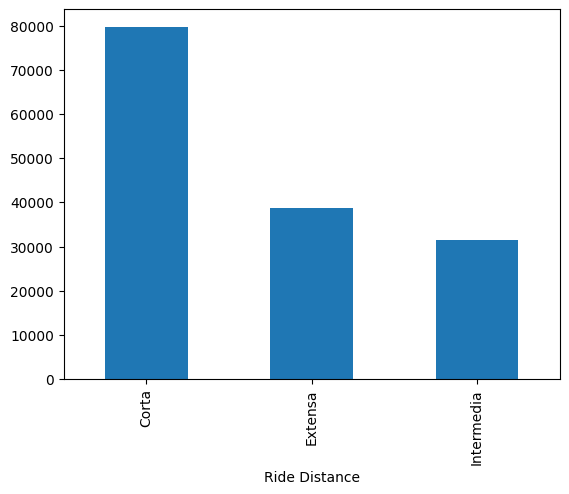

In [74]:
# Transformacion de variables
distance_bins = [0, 15, 30, float('inf')]
distance_labels = ['Corta', 'Intermedia', 'Extensa']

selected_data['Ride Distance'] = pd.cut(selected_data['Ride Distance'] , bins=bins, labels=labels, include_lowest=True)
selected_data['Ride Distance'].value_counts().plot(kind='bar')

<Axes: xlabel='Avg CTAT'>

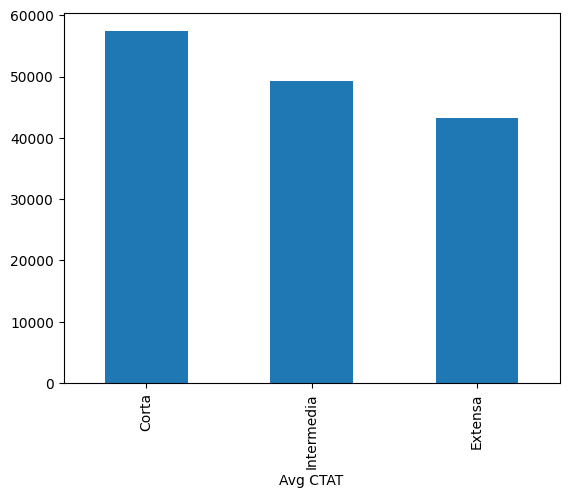

In [75]:
# Transformacion de variables
ctat_bins = [0, 10, 45, float('inf')]
ctat_labels = ['Alto', 'Medio', 'Bajo']

selected_data['Avg CTAT'] = pd.cut(selected_data['Avg CTAT'] , bins=bins, labels=labels, include_lowest=True)
selected_data['Avg CTAT'].value_counts().plot(kind='bar')

<Axes: xlabel='Avg VTAT'>

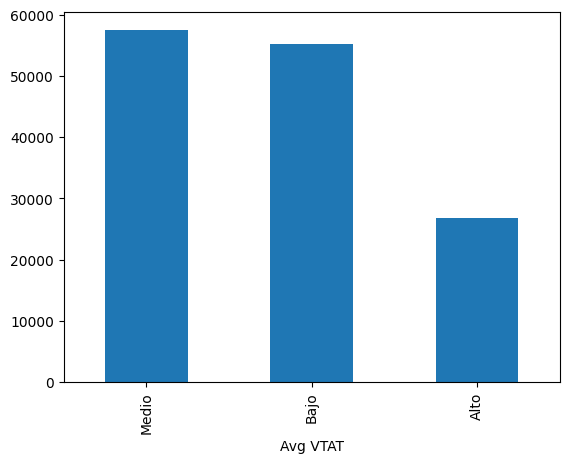

In [80]:
bins = [2, 7, 12, 20]
labels = ['Bajo', 'Medio', 'Alto']

selected_data['Avg VTAT'] = pd.cut(
    selected_data['Avg VTAT'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
selected_data['Avg VTAT'].value_counts().plot(kind='bar')
